# Hierarchical clustering for analyzing City Networks Membership Dataset

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


## Downloading dataset

In [10]:
file_path = './dataset/anomaly_dataset.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10343 entries, 0 to 10342
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CITY                10343 non-null  object 
 1   Country             10343 non-null  object 
 2   full.location.name  10343 non-null  object 
 3   latitude.y          10338 non-null  float64
 4   longitude.y         10338 non-null  float64
 5   TMN                 10343 non-null  int64  
 6   ETMN                4199 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 565.8+ KB


,CITY,Country,full.location.name,latitude.y,longitude.y,TMN,ETMN
0,Aa en Hunze,Netherlands,"Aa en Hunze, Netherlands",53.010485,6.749529,1,NaN
1,Aachen,Germany,"Aachen, Germany",50.775346,6.083887,3,2.0
2,Aalborg,Denmark,"Aalborg, Denmark",57.048820,9.921747,3,3.0
3,Aalen,Germany,"Aalen, Germany",48.836689,10.097116,2,1.0
4,Aalst,Belgium,"Aalst, Belgium",50.937810,4.040952,1,NaN


## Data preprocessing

In [4]:
selected_columns = ['latitude.y', 'longitude.y', 'TMN', 'ETMN']
data_selected = data[selected_columns].dropna()

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_selected)

## Hierarchical clustering and dendrogram construction

In [18]:
linkage_matrix_ward = linkage(normalized_data, method='ward')
linkage_matrix_single = linkage(normalized_data, method='single')
linkage_matrix_complete = linkage(normalized_data, method='complete')
linkage_matrix_average = linkage(normalized_data, method='average')

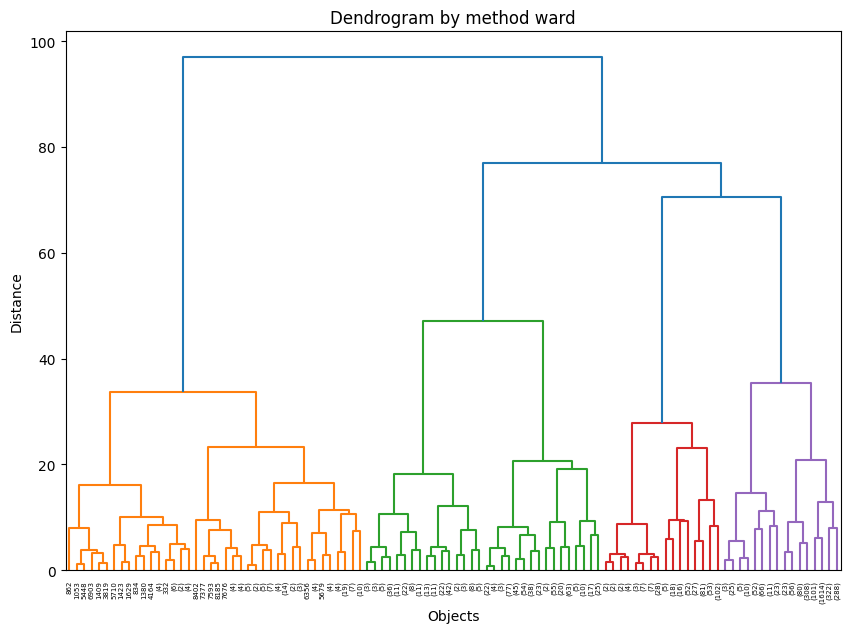

In [76]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_ward, labels=data_selected.index, leaf_rotation=90, truncate_mode='level', p=6)
plt.title('Dendrogram by method ward')
plt.xlabel('Objects')
plt.ylabel('Distance')
plt.show()

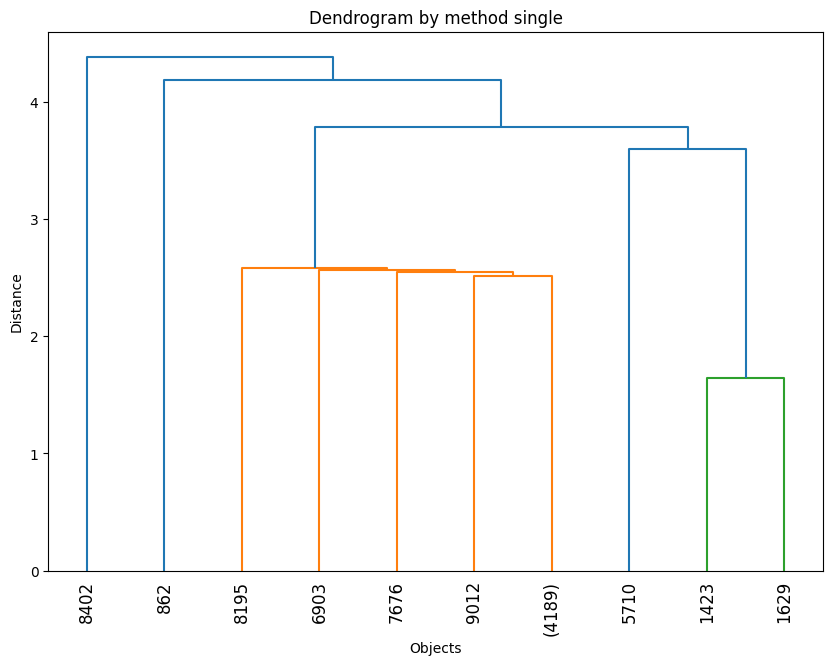

In [77]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_single, labels=data_selected.index, leaf_rotation=90, truncate_mode='level', p=6)
plt.title('Dendrogram by method single')
plt.xlabel('Objects')
plt.ylabel('Distance')
plt.show()

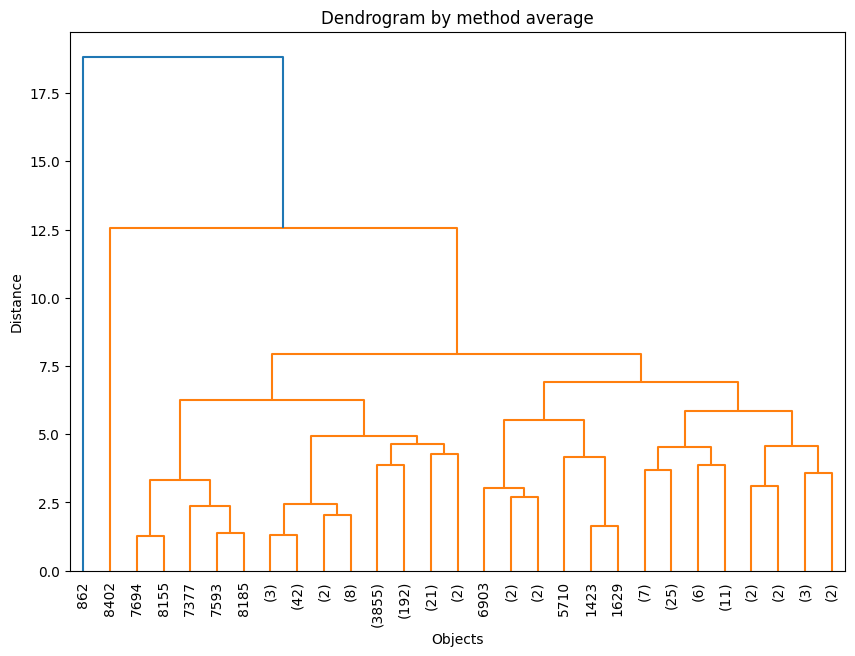

In [78]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_average, labels=data_selected.index, leaf_rotation=90, truncate_mode='level', p=6)
plt.title('Dendrogram by method average')
plt.xlabel('Objects')
plt.ylabel('Distance')
plt.show()

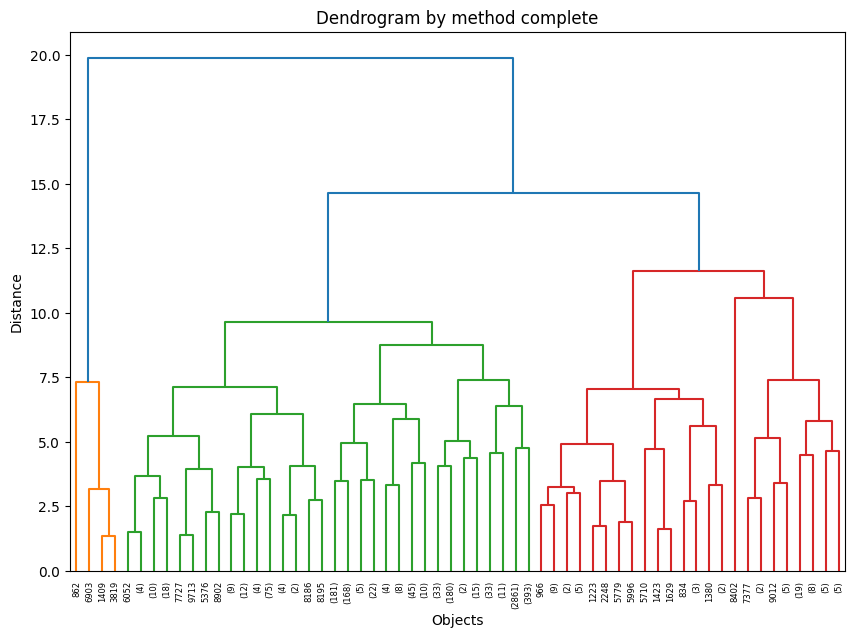

In [79]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_complete, labels=data_selected.index, leaf_rotation=90,truncate_mode='level', p=6)
plt.title('Dendrogram by method complete')
plt.xlabel('Objects')
plt.ylabel('Distance')
plt.show()

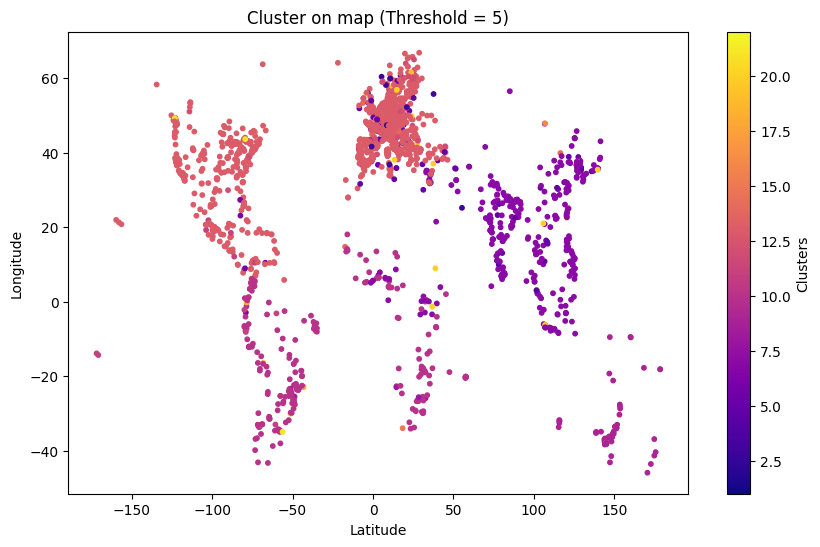

In [80]:
clusters_distance_t_5 = fcluster(linkage_matrix_complete, t=5, criterion='distance')
data_selected['Cluster'] = clusters_distance_t_5

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['longitude.y'], data_selected['latitude.y'], c=clusters_distance_t_5, cmap='plasma', s=10)
plt.title('Cluster on map (Threshold = 5)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Clusters')
plt.show()

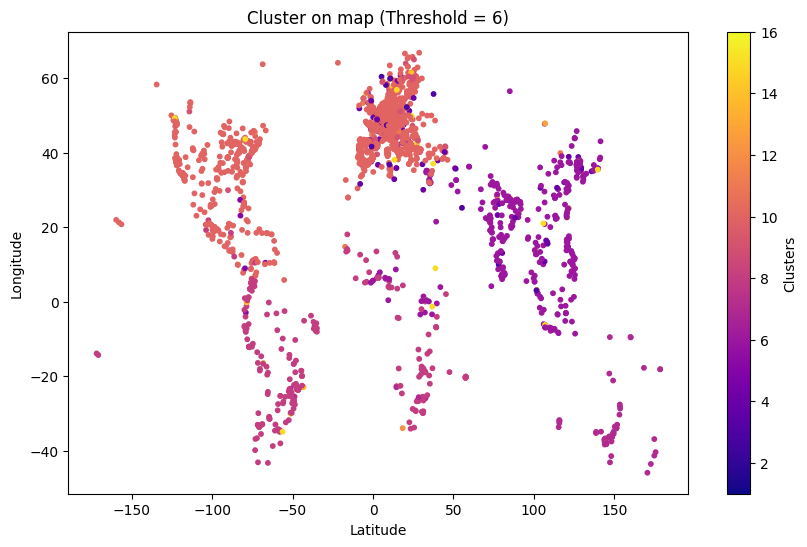

In [81]:
clusters_distance_t_6 = fcluster(linkage_matrix_complete, t=6, criterion='distance')
data_selected['Cluster'] = clusters_distance_t_6

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['longitude.y'], data_selected['latitude.y'], c=clusters_distance_t_6, cmap='plasma', s=10)
plt.title('Cluster on map (Threshold = 6)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Clusters')
plt.show()

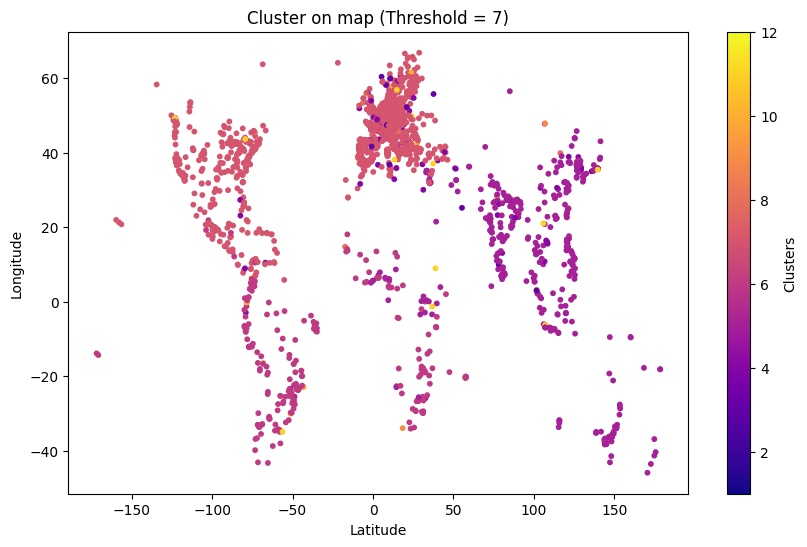

In [82]:
clusters_distance_t_7 = fcluster(linkage_matrix_complete, t=7, criterion='distance')
data_selected['Cluster'] = clusters_distance_t_7

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['longitude.y'], data_selected['latitude.y'], c=clusters_distance_t_7, cmap='plasma', s=10)
plt.title('Cluster on map (Threshold = 7)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Clusters')
plt.show()

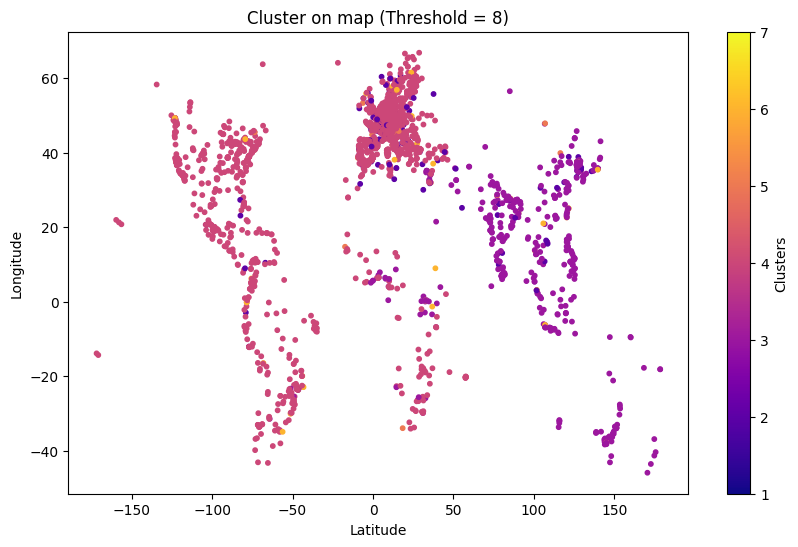

In [92]:
clusters_distance_t_8 = fcluster(linkage_matrix_complete, t=8, criterion='distance')
data_selected['Cluster'] = clusters_distance_t_8

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['longitude.y'], data_selected['latitude.y'], c=clusters_distance_t_8, cmap='plasma', s=10)
plt.title('Cluster on map (Threshold = 8)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Clusters')
plt.show()

In [95]:
silhouette_5 = silhouette_score(normalized_data, clusters_distance_t_5)
silhouette_6 = silhouette_score(normalized_data, clusters_distance_t_6)
silhouette_7 = silhouette_score(normalized_data, clusters_distance_t_7)
silhouette_8 = silhouette_score(normalized_data, clusters_distance_t_8)


print(f'Silhouette Score for threshold 5: {silhouette_5}')
print(f'Silhouette Score for threshold 6: {silhouette_6}')
print(f'Silhouette Score for threshold 7: {silhouette_7}')
print(f'Silhouette Score for threshold 8: {silhouette_8}')

Silhouette Score for threshold 5: 0.545779039029611
Silhouette Score for threshold 6: 0.5582393266432436
Silhouette Score for threshold 7: 0.5596738240491095
Silhouette Score for threshold 8: 0.5293641648583186


## Anomalous clusters

Anomalous clusters (size less than 10): [1, 7]


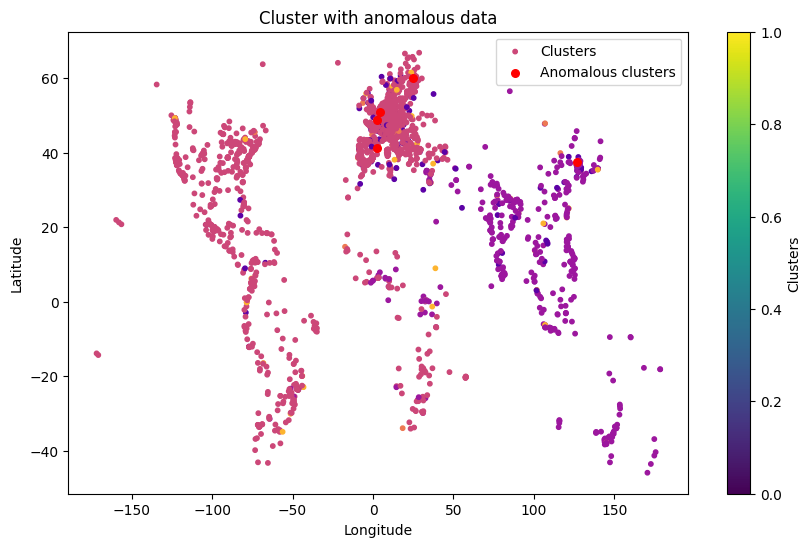

Objects in anomalous data:
      latitude.y  longitude.y  TMN  ETMN  Cluster
862    41.385064     2.173404   23  12.0        1
1409   50.850346     4.351721   19   7.0        1
3819   60.169856    24.938379   17   7.0        1
6903   48.856614     2.352222   20   9.0        1
8402   37.566535   126.977969    1  11.0        7


In [94]:
cluster_sizes = data_selected['Cluster'].value_counts()

anomalous_threshold = 10
anomalous_clusters = cluster_sizes[cluster_sizes < anomalous_threshold].index
print(f"Anomalous clusters (size less than {anomalous_threshold}): {list(anomalous_clusters)}")

anomalous_data = data_selected[data_selected['Cluster'].isin(anomalous_clusters)]

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['longitude.y'], data_selected['latitude.y'], c=data_selected['Cluster'], cmap='plasma', s=10, label='Clusters')
plt.scatter(anomalous_data['longitude.y'], anomalous_data['latitude.y'], c='red', s=30, label='Anomalous clusters')
plt.title('Cluster with anomalous data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.colorbar(label='Clusters')
plt.show()


print("Objects in anomalous data:")
print(anomalous_data)